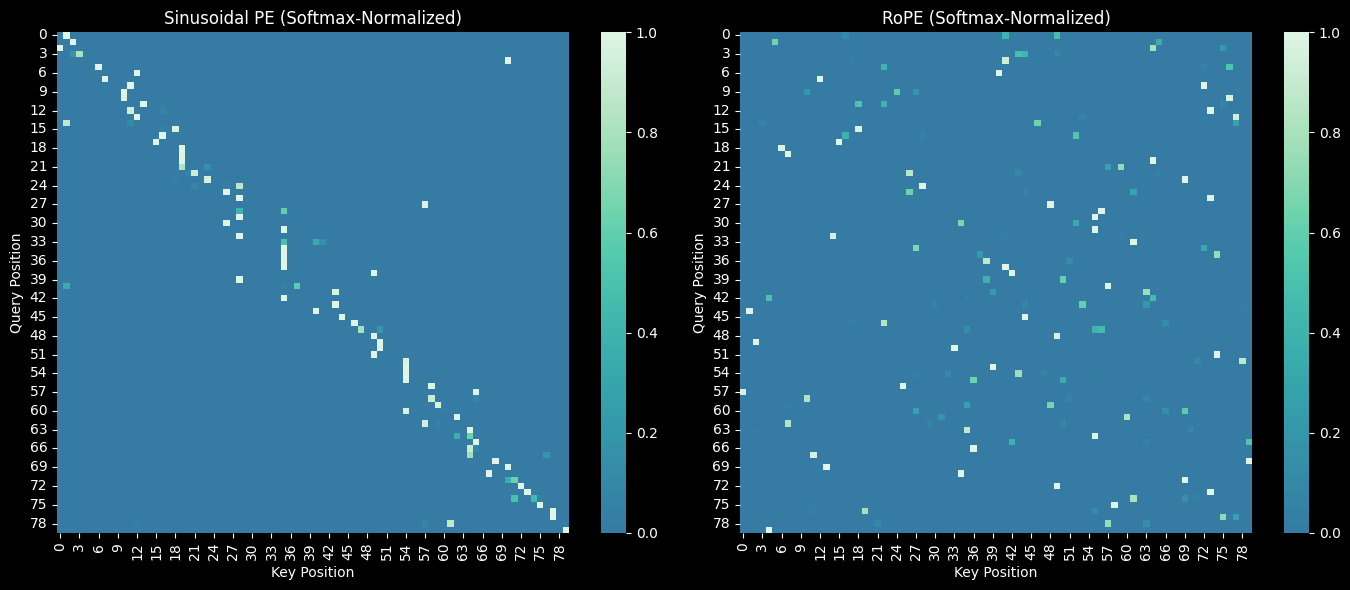

In [20]:
# Modify the color scheme to be darker with vibrant colors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate random queries and keys
def generate_random_queries_and_keys(seq_len, d_model):
    queries = np.random.randn(seq_len, d_model)
    keys = np.random.randn(seq_len, d_model)
    return queries, keys

# Function to calculate attention scores (dot products between queries and keys) and apply softmax
def calculate_attention_scores(queries, keys):
    raw_scores = np.dot(queries, keys.T)
    # Apply softmax to normalize the attention scores
    softmax_scores = np.exp(raw_scores) / np.sum(np.exp(raw_scores), axis=1, keepdims=True)
    return softmax_scores

# Function to calculate Sinusoidal Positional Encoding (as per the original transformer)
def sinusoidal_positional_encoding(seq_len, d_model):
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return pe

# Function to calculate RoPE (Rotary Position Embedding)
def rope_positional_encoding(queries, keys, seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    theta = 10000 ** (-2 * np.arange(d_model // 2) / d_model)
    angles = pos * theta

    queries[:, 0::2] = np.cos(angles) * queries[:, 0::2] - np.sin(angles) * queries[:, 1::2]
    queries[:, 1::2] = np.sin(angles) * queries[:, 0::2] + np.cos(angles) * queries[:, 1::2]

    keys[:, 0::2] = np.cos(angles) * keys[:, 0::2] - np.sin(angles) * keys[:, 1::2]
    keys[:, 1::2] = np.sin(angles) * keys[:, 0::2] + np.cos(angles) * keys[:, 1::2]

    return queries, keys

# Simulation parameters
seq_len = 80  # Sequence length (e.g., 64 tokens)
d_model = 256  # Embedding dimension (64-dimensional queries and keys)

# Generate random queries and keys
queries, keys = generate_random_queries_and_keys(seq_len, d_model)

# 1. Apply Sinusoidal Positional Encoding to both queries and keys
sin_pe = sinusoidal_positional_encoding(seq_len, d_model)
queries_sin_pe = queries + sin_pe  # Add positional encoding
keys_sin_pe = keys + sin_pe

# Calculate attention scores for Sinusoidal PE and apply softmax normalization
attention_scores_sin_pe = calculate_attention_scores(queries_sin_pe, keys_sin_pe)

# 2. Apply RoPE (Rotary Position Embedding)
queries_rope, keys_rope = rope_positional_encoding(queries, keys, seq_len, d_model)

# Calculate attention scores for RoPE and apply softmax normalization
attention_scores_rope = calculate_attention_scores(queries_rope, keys_rope)

# Plot normalized attention scores (softmax) heatmaps with a darker theme and vibrant colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Dark background theme
plt.style.use('dark_background')

# Sinusoidal PE attention heatmap (softmax normalized)
sns.heatmap(attention_scores_sin_pe, ax=ax1, cmap="mako", center=0, cbar=True)
ax1.set_title("Sinusoidal PE (Softmax-Normalized)", color='white')
ax1.set_xlabel("Key Position", color='white')
ax1.set_ylabel("Query Position", color='white')

# RoPE attention heatmap (softmax normalized)
sns.heatmap(attention_scores_rope, ax=ax2, cmap="mako", center=0, cbar=True)
ax2.set_title("RoPE (Softmax-Normalized)", color='white')
ax2.set_xlabel("Key Position", color='white')
ax2.set_ylabel("Query Position", color='white')

plt.tight_layout()
plt.show()